# Linear Regression

In this notebook, we'll discover how to find a line of best fit for our dataset.  Here's a sample dataset for us to work with.

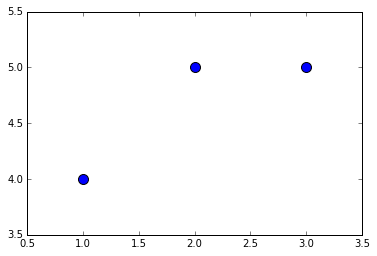

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = [1,2,3]
y = [4,5,5]

fig = plt.scatter(x,y, s=100)
plt.axis([0.5, 3.5, 3.5, 5.5]) #plt.axis([left, right, bottom, top]) 
plt.show()

As you can see, these points are not all on a line.  We want to find a __line of best fit__, one which minimizes some error function.  Here are some example lines.

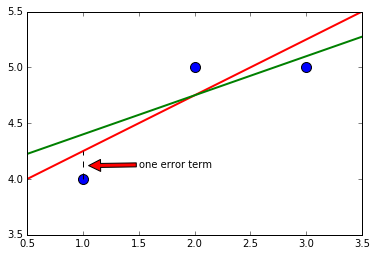

In [3]:
# lines with coordinates (b,m)
line_1 = (3.75,.5)
line_2 = (4.05,.35)

# set up the plot
fig = plt.scatter(x,y, s=100)
plt.axis([0.5, 3.5, 3.5, 5.5])

# add the two lines
for line,color in ((line_1,'r'),(line_2,'g')):
    plt.plot([0, 3.5], [line[0], line[0] + 3.5* line[1]], color=color, linestyle='-', linewidth=2)

# point out an error term    
plt.plot([1,1],[4,4.25],color='k',linestyle='--',linewidth=1)
plt.annotate('one error term', xy=(1.05, 4.12), xytext=(1.5, 4.1), arrowprops=dict(facecolor='red')) 
plt.show()

The error term we choose is the __squared error__: if my points are $(x_1,y_1),(x_2,y_2),\ldots,(x_n,y_n)$, and the line we're considering is $y=mx+b$, then the error is:

$$E = \sum_{i=1}^n\big(y_i - (m\cdot x_i + b)\big)^2$$

(_Side note:_ We typically talk about the _root mean squared error_, which would entail taking the square root of the above and then dividing by $n$.  It's not hard to see that the if we pick a line which minimizes the squared error, then it also minimizes the root mean squared error, so we don't really need to worry about it.)

Now, if all my points actualy lay on the line of best fit, then the following equations would be true:

\begin{align}
1 \cdot m + b &= 4\\
2 \cdot m + b &= 5 \\
3 \cdot m + b &= 5\\
\end{align}

Of course, this is not true: the equations above are __LIES__.  To fix this, we need to add the error terms $e_1,e_2,e_3$.  (Note: we have equations for these error terms, but they won't be needed for long.)

\begin{align}
1 \cdot m + b &= 4 \color{red}{ + e_1 }\\
2 \cdot m + b &= 5 \color{red}{ + e_2 }\\
3 \cdot m + b &= 5 \color{red}{ + e_3 }\\
\end{align}

Okay, so now I need to find an $m$ and a $b$ (and a corresponding $e_1,e_2,$ and $e_3$) that makes the error terms as small as possible.  To do this, we need to borrow an important __FACT__ from linear algebra.  It's not a hard thing to show, but it would take way more time than we have in this course.  First, we need to rephrase our _system of equations_ into a _matrix equation_: 

$$\left[\begin{array}{cc} 1 & 1 \\ 2 & 1 \\ 3 & 1 \end{array}\right]\cdot 
\left[\begin{array}{c} m \\ b \end{array}\right] = 
\left[\begin{array}{c} 4\\ 5 \\ 5 \end{array}\right] + 
\left[\begin{array}{c} e_1 \\ e_2 \\ e_3 \end{array}\right]$$

Let's define these matrices: 
$$A = \left[\begin{array}{cc} 1 & 1 \\ 2 & 1 \\ 3 & 1 \end{array}\right]\hspace{.75in} 
\sigma = \left[\begin{array}{c} m \\ b \end{array}\right] \hspace{.75in}
b = \left[\begin{array}{c} 4\\ 5 \\ 5 \end{array}\right] \hspace{.75in}
e = \left[\begin{array}{c} e_1 \\ e_2 \\ e_3 \end{array}\right]
$$

So here's the awesome fact: 
Saying "Find me $m$ and $b$ with the smallest $(e_1,e_2,e_3)$" is the same as saying "Find me an $m$ and $b$ so that $$A^T e = \left[\begin{array}{c} 0 \\ 0 \end{array}\right]."$$
($A^T$ is the _transpose_ of $A$, you get it by switching the rows with the columns.)

This may not seem like much, but it helps a ton, because that means that we can multiply both sides of this matrix equation by $A^T$ and get rid of all the error terms:

$$A^T A \sigma = A^T b$$

In our example, this becomes:

In [4]:
A = np.array([[1,1],[2,1],[3,1]])
b = np.array([4,5,5])

print("Left side: ",A.T.dot(A),'',"Right side: ", A.T.dot(b),sep='\n')

Left side: 
[[14  6]
 [ 6  3]]

Right side: 
[29 14]


Thanks numpy!  Prettier: 
$$\left[\begin{array}{cc} 13 & 6 \\ 6 & 3 \end{array}\right]\cdot 
\left[\begin{array}{c} m \\ b \end{array}\right] = 
\left[\begin{array}{c} 29 \\ 14 \end{array}\right]$$
Or, as a system of equations: 
\begin{align}
6\cdot b + 14\cdot m &= 29 \\
3\cdot b + 6\cdot m &= 14
\end{align}
Notice that the error term disappears.  We can solve this system of equations!  Subtracting twice the second from the first:
$$ 0\cdot b + (14-12)\cdot m = 1$$
So $m = \frac{1}{2}$, hence $b = \frac{11}{3}$.  Let's plot our best fit line.

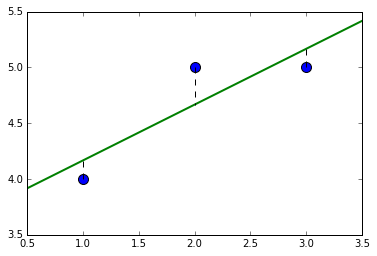

In [5]:
# best fit line with coordinates (b,m)
line = (11/3,.5)
points_on_line = np.array([[x_value,line[0] + x_value * line[1]] for x_value in [1,2,3]])

# set up the plot
fig = plt.scatter(x,y, s=100)
plt.axis([0.5, 3.5, 3.5, 5.5])

# add the line
plt.plot([0, 3.5], [line[0], line[0] + 3.5* line[1]], color='g', linestyle='-', linewidth=2)

# point out the error terms
for x,y in points_on_line:
    plt.plot([x,x],[{1:4,2:5,3:5}[x],y],color='k',linestyle='--',linewidth=1)

In general, the answer becomes:
$$\sigma = (A^T A)^{-1} A^T b$$
But there are algorithms that help speed this process up.

_Side Note:_ The important equations we came up with are called the __normal equations__: 

\begin{align}
3\cdot b + 6\cdot m &= 14 \\  
6\cdot b + 14\cdot m &= 29
\end{align}

If you happen to know some multivariable calculus, you can derive these by taking the partial derivatives $\frac{\partial\ E}{\partial m}$ and $\frac{\partial\ E}{\partial b}$ and setting them both equal to zero.  This avoids the linear algebra fact.